In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.cm as cm

from sklearn.manifold import MDS
from sklearn.model_selection import train_test_split
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA


In [2]:
CSV_FILE_PATH = '../Datasets/new_df_with_colors.csv'
CSV_FILE_PATH_VAL = '../Datasets/new_df_with_colors_val.csv'
df = pd.read_csv(CSV_FILE_PATH, usecols=lambda x: 'Unnamed' not in x)
df_val = pd.read_csv(CSV_FILE_PATH_VAL, usecols=lambda x: 'Unnamed' not in x)

In [3]:
select = df.loc[:, [
'original_firstorder_Kurtosis',
'original_firstorder_MeanAbsoluteDeviation',
'original_firstorder_Range', 'original_firstorder_RootMeanSquared',
'original_firstorder_Skewness', 'original_glcm_ClusterProminence',
'original_glcm_ClusterShade', 'original_glcm_Contrast',
'original_glcm_JointAverage', 'original_glcm_MCC',
'original_glcm_SumAverage',
'original_gldm_DependenceNonUniformity',
'original_gldm_DependenceNonUniformityNormalized',
'original_gldm_GrayLevelNonUniformity',
'original_glrlm_LongRunEmphasis',
'original_glrlm_LowGrayLevelRunEmphasis',
'original_glrlm_RunVariance', 'original_glrlm_ShortRunEmphasis',
'original_glszm_GrayLevelVariance',
'original_glszm_LargeAreaLowGrayLevelEmphasis',
'original_glszm_LowGrayLevelZoneEmphasis',
'original_glszm_SizeZoneNonUniformity',
'original_glszm_SmallAreaHighGrayLevelEmphasis',
'original_glszm_ZoneEntropy', 'original_glszm_ZonePercentage',
'original_ngtdm_Busyness', 'original_ngtdm_Complexity',
'original_ngtdm_Strength', 'original_shape2D_Elongation',
'original_shape2D_Sphericity', 'mean_b', 'mean_r', 'std_b',
'std_g'
                 ]]

In [4]:
#df_first_103 = df.iloc[:, :408]

In [5]:
#df_first_103

In [6]:
corr = df.corr()

<Axes: >

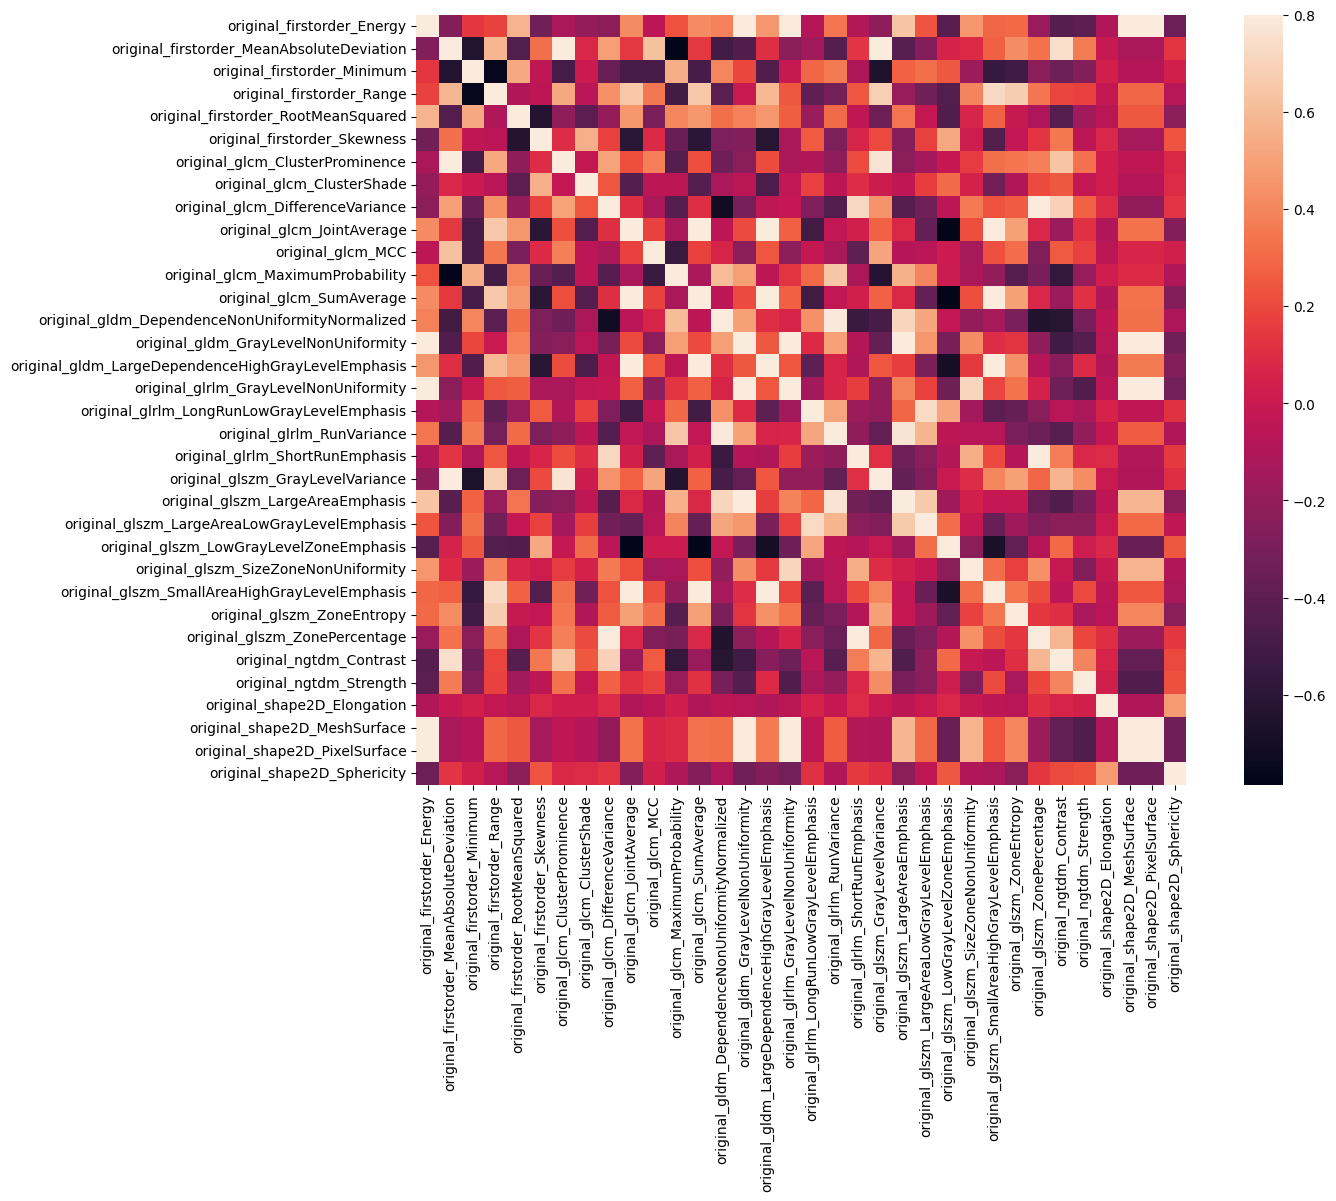

In [7]:
# Set up the matplotlib figure, make it big!
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, vmax=.8,square=True)

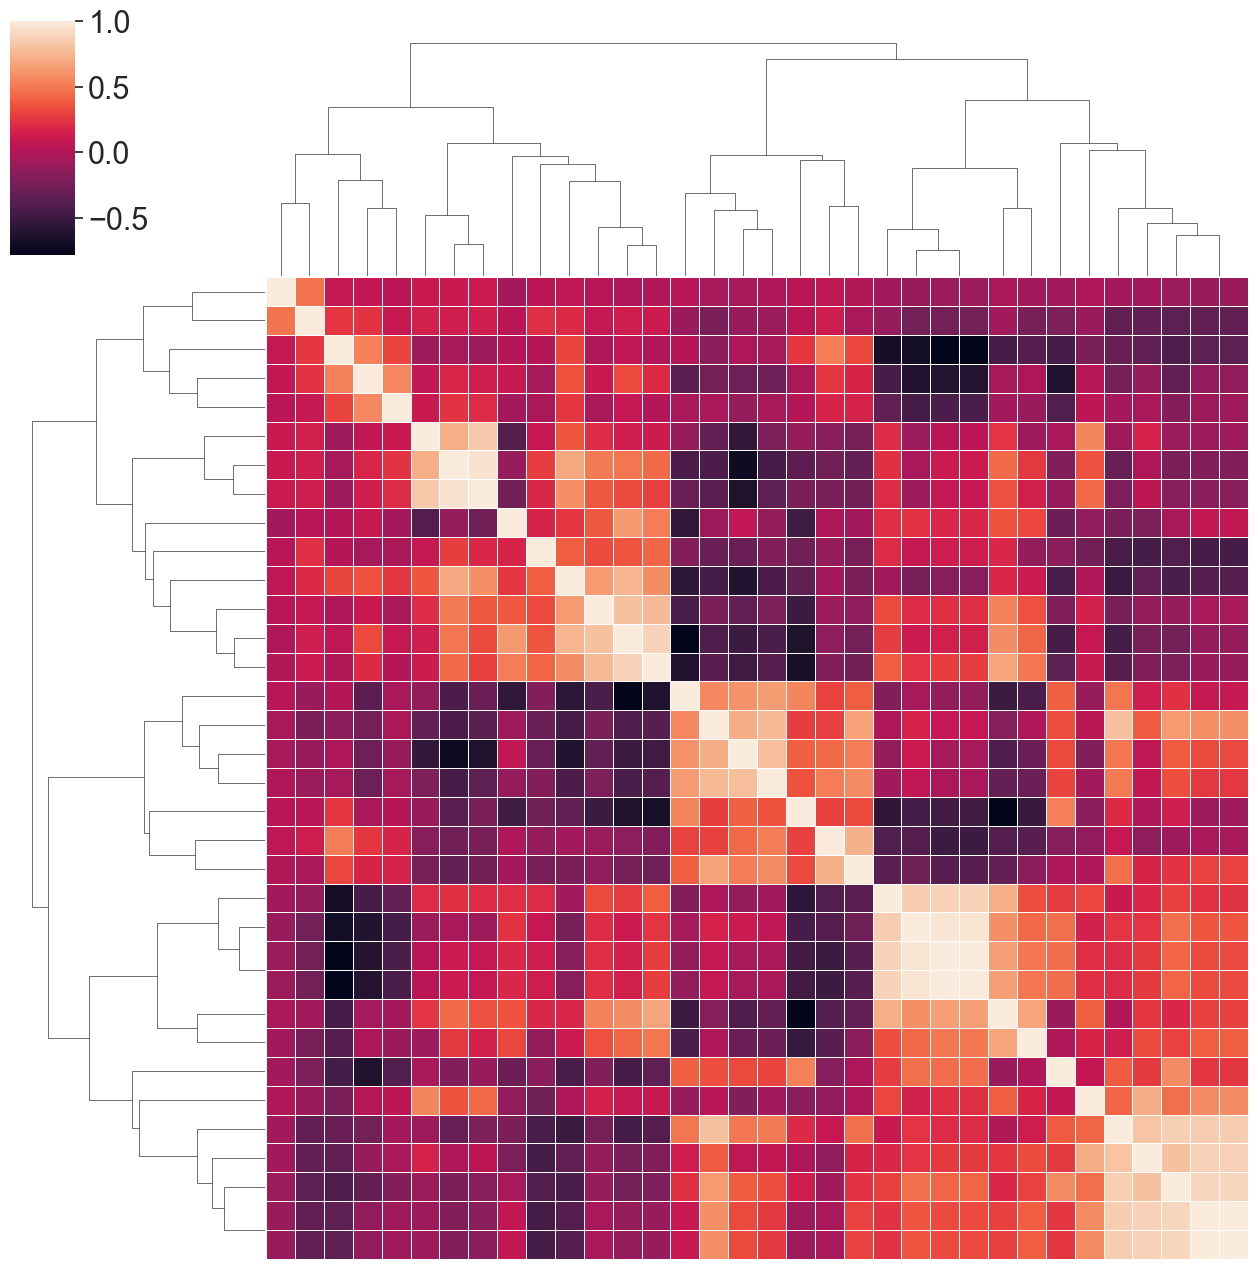

In [12]:
sns.set(font_scale=2)
# Choose a subset of features for clustering
pp = sns.clustermap(select.corr(), linewidths=.5, figsize=(13,13), xticklabels=False, yticklabels=False)
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)

plt.show()

In [9]:
df_first_last = df.iloc[:, list(range(103)) + [-1]]
train, test = train_test_split(df_first_last, stratify=df_first_last[['category']], test_size=0.05)

In [10]:
test.reset_index(inplace=True)
test


,index,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,...,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,category,category
0,35148,21.0,128.0,1.380334e+08,2.291459,41.0,3.192035,165.0,56.565967,29.998637,...,227.349423,227.554389,29764.5,168.895335,680.097546,0.022849,29765.0,0.899255,5,5
1,29074,84.0,166.0,7.675233e+08,2.276353,40.0,2.897270,207.0,130.815878,24.471412,...,248.663192,265.067916,42498.5,222.477975,826.121933,0.019439,42499.0,0.884601,6,6
2,12680,132.0,175.0,3.549485e+09,1.596780,23.0,4.133695,211.0,154.903631,13.599644,...,604.331846,608.032894,146052.5,332.961968,1735.075252,0.011880,146053.0,0.780802,0,0
3,1670,22.0,103.0,9.310911e+07,2.063519,32.0,4.339923,171.0,47.963028,24.580853,...,200.763753,209.066975,28020.5,178.240852,636.783838,0.022726,28021.0,0.931860,6,6
4,6895,135.0,182.0,4.596686e+09,1.661989,22.0,3.285869,205.0,157.805080,14.087477,...,538.359111,580.220648,182181.5,435.926858,1697.449927,0.009317,182182.0,0.891374,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,7213,29.0,113.0,8.094836e+08,1.886847,42.0,3.378702,220.0,57.828023,26.878608,...,546.546492,558.855974,182396.5,427.520490,1746.101731,0.009573,182397.0,0.867049,4,4
1887,20879,128.0,165.0,1.860581e+09,1.364393,18.0,4.444733,192.0,148.706443,11.594229,...,730.072883,609.842603,83281.5,250.699136,2313.422582,0.027778,83282.0,0.442206,2,2
1888,17758,151.0,179.0,1.174371e+09,1.121107,14.0,3.302735,192.0,165.080519,8.514187,...,291.229088,288.321002,42908.5,188.788800,825.695526,0.019243,42909.0,0.889317,1,1
1889,248,47.0,114.0,1.637144e+08,2.033448,35.0,2.791759,231.0,75.438452,20.409909,...,187.901216,197.385410,25922.5,176.660752,615.085353,0.023728,25923.0,0.927915,2,2


In [11]:
mds = MDS(n_components=2)
mds_transformed = mds.fit_transform(test)
# plot the scatterplot
plt.scatter(mds_transformed[:,0], mds_transformed[:,1], c=test['category'], alpha=0.6)
# Add a legend to the plot
plt.colorbar()

c:\Users\Krystian\miniconda3\envs\pytorch_3_11\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
similarities = euclidean_distances(test.values)
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=5000, eps=1e-12, random_state=seed,
                   n_init=10,
                   dissimilarity="precomputed", n_jobs=1, metric=False)
pos = mds.fit_transform(similarities)


c:\Users\Krystian\miniconda3\envs\pytorch_3_11\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
test

,index,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,...,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,original_firstorder_10Percentile_r,category
0,3404,123.0,166.0,2.734107e+09,1.518624,22.0,3.078398,212.0,145.875977,13.254581,...,540.954920,582.115109,126864.0,302.533025,1927.900720,0.015197,126864.0,0.654922,197.0,4
1,25303,104.0,145.0,1.222958e+09,1.456023,23.0,2.939396,211.0,122.951084,12.922444,...,327.954245,343.588417,79584.5,316.634866,1138.129076,0.014301,79585.0,0.878674,142.0,3
2,31401,57.0,131.0,9.651323e+08,2.185297,44.0,2.126442,165.0,92.227187,23.242985,...,429.160731,520.784984,104129.0,332.926164,1628.243866,0.015637,104130.0,0.702540,79.0,6
3,19119,168.0,195.0,2.710670e+09,1.024247,13.0,17.682592,213.0,181.910908,9.581829,...,395.257143,482.265487,81387.0,284.676672,1545.190042,0.018986,81388.0,0.654486,194.0,1
4,22519,35.0,130.0,1.838182e+08,2.413415,64.0,1.815656,165.0,77.896948,31.991251,...,208.041473,203.887224,24899.5,155.667149,653.411255,0.026242,24900.0,0.856079,56.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,4367,54.0,140.0,1.062600e+09,2.151901,62.0,1.618712,173.0,93.325892,29.370166,...,472.523335,476.463010,108621.5,295.471671,1394.195093,0.012835,108622.0,0.837991,116.0,4
1887,6133,82.0,168.0,1.844496e+08,2.378117,53.0,2.138687,197.0,121.908746,27.312682,...,141.166109,146.563979,11604.5,105.002623,427.788889,0.036864,11605.0,0.892665,136.0,4
1888,24093,103.0,183.0,3.307291e+09,2.364594,42.0,2.758640,245.0,144.182603,24.601805,...,514.209726,655.080148,152221.5,390.116986,2014.067243,0.013231,152226.0,0.686703,133.0,3
1889,21378,64.0,133.0,4.329151e+08,2.089862,33.0,2.666344,169.0,94.088838,20.429649,...,280.414674,309.362247,45565.5,217.666360,1011.719913,0.022204,45566.0,0.747933,101.0,2


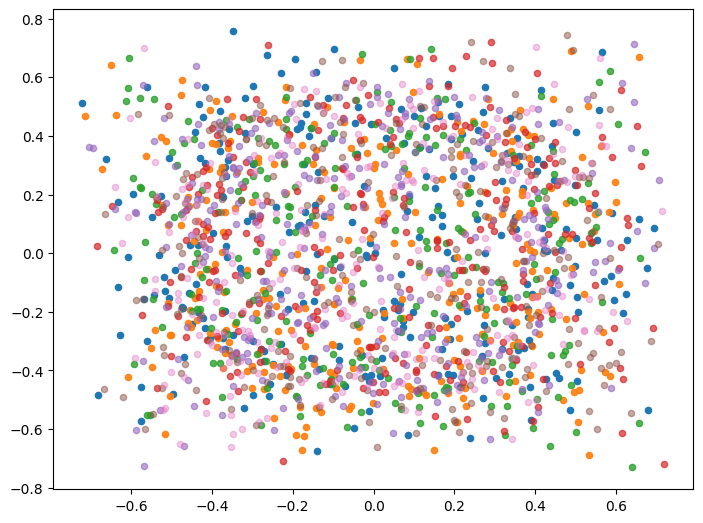

In [ ]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])
s = 20


akiec = test.index[test['category'] == 0].tolist()
bcc = test.index[test['category'] == 1].tolist()
bkl = test.index[test['category'] == 2].tolist()
df = test.index[test['category'] == 3].tolist()
nv = test.index[test['category'] == 4].tolist()
vasc = test.index[test['category'] == 5].tolist() 
mel = test.index[test['category'] == 6].tolist()  

plt.scatter(pos[akiec, 0], pos[akiec, 1], c='#1f77b4', alpha=1, s=s, lw=1, label='akiec')
plt.scatter(pos[bcc, 0], pos[bcc, 1], c='#ff7f0e', alpha=0.9, s=s, lw=1, label='bcc')
plt.scatter(pos[bkl, 0], pos[bkl, 1], c='#2ca02c', alpha=0.8, s=s, lw=1, label='bkl')
plt.scatter(pos[df, 0], pos[df, 1], c='#d62728', alpha=0.7, s=s, lw=1, label='df')
plt.scatter(pos[nv, 0], pos[nv, 1], c='#9467bd', alpha=0.6, s=s, lw=1, label='nv')
plt.scatter(pos[vasc, 0], pos[vasc, 1], c='#8c564b', alpha=0.5, s=s, lw=1, label='vasc')
plt.scatter(pos[mel, 0], pos[mel, 1], c='#e377c2', alpha=0.4, s=s, lw=1, label='mel')